- *Análise exploratória de dados de produção solar (Pecém, Ceará)*

In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from src.plotting import *
from src.preprocessing import compilar_dados

- *Localização estratégica (perto do Porto de Pecém)*

<img src="images/localizacao.png" alt="Localização" style="width: 300px;"/>

- *Motivação... (atraindo investimentos em grande escala)*

<img src="images/motivacao.png" alt="Localização" style="width: 500px;"/>

- *Preparação e tratamento de dados (estimativa de produção solar para uma planta de **3.5MWAc)***

In [2]:
INPUT_DIR = os.path.join(os.getcwd(), "data", "input")

dados_solcast = compilar_dados(
    diretorio=INPUT_DIR, base_de_dados="Solcast", salvar_dados=True
)

- *Cálculo da distribuição horária de energia*

<Figure size 1800x600 with 0 Axes>

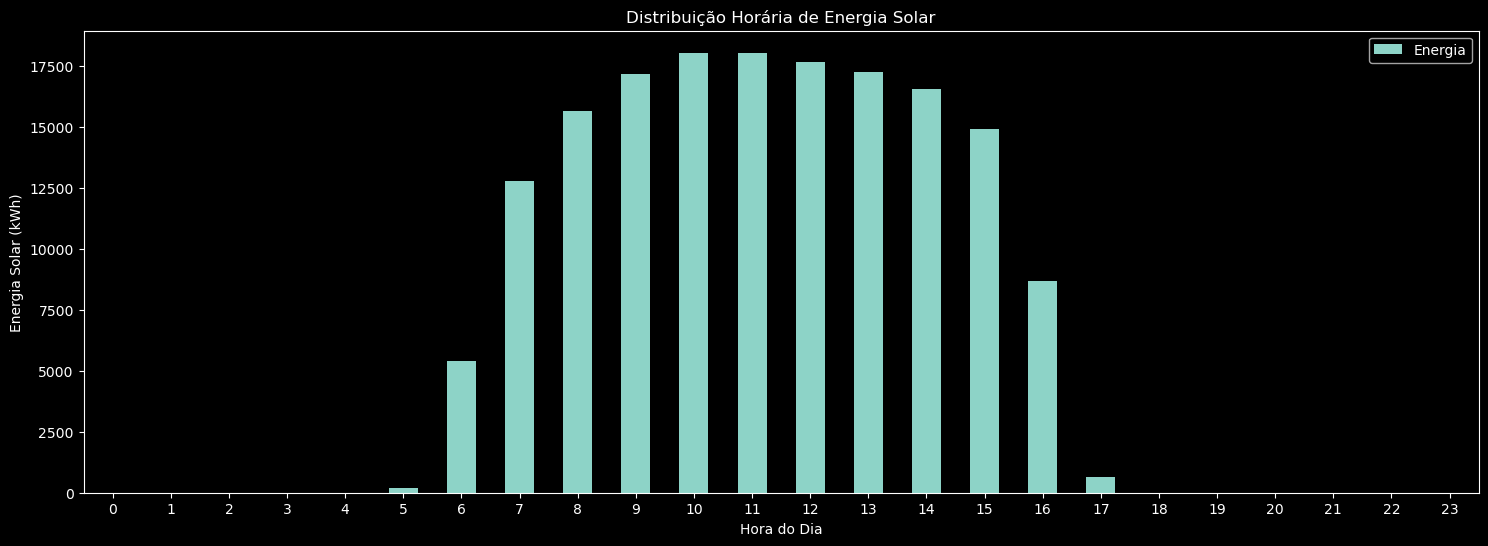

In [3]:
plotar_distribuicao_horaria(data=dados_solcast, salvar_imagem=True, figsize=(18, 6))

- *Cálculo da distribuição mensal de energia*

<Figure size 1800x600 with 0 Axes>

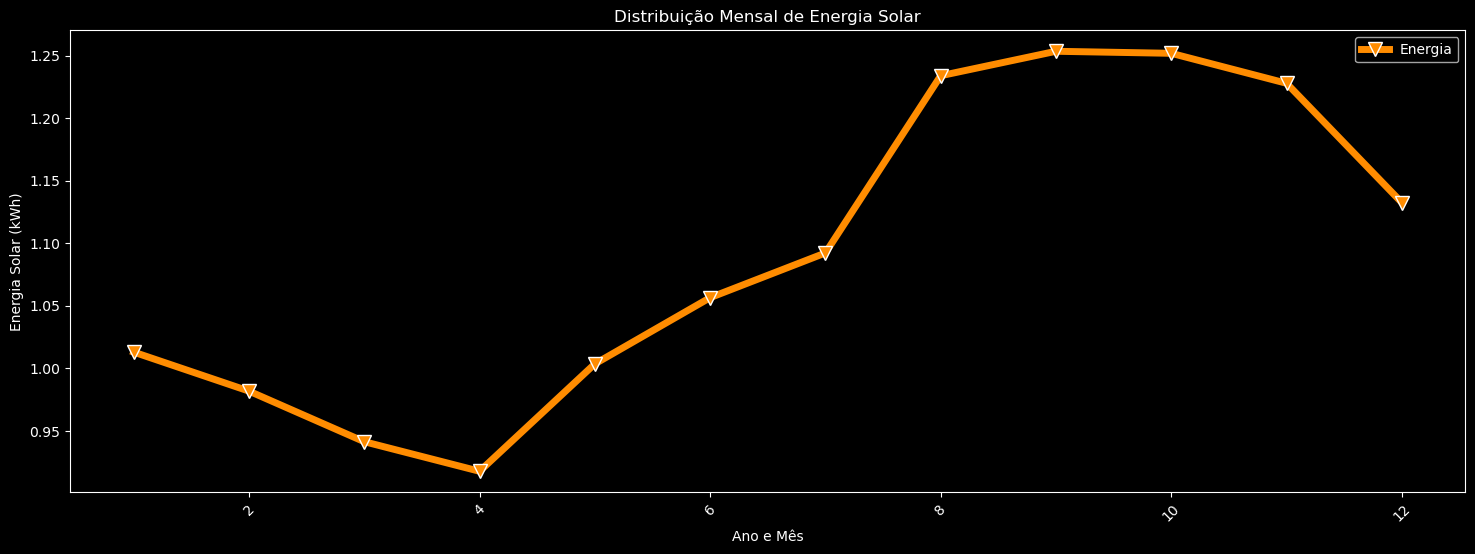

In [4]:
plotar_distribuicao_mensal(
    data=dados_solcast,
    salvar_imagem=True,
    figsize=(18, 6),
    lw=5,
    color="darkorange",
    marker="v",
    mec="w",
    ms=10,
)

- *Calcular os anos de maior geração solar*

<Figure size 1800x600 with 0 Axes>

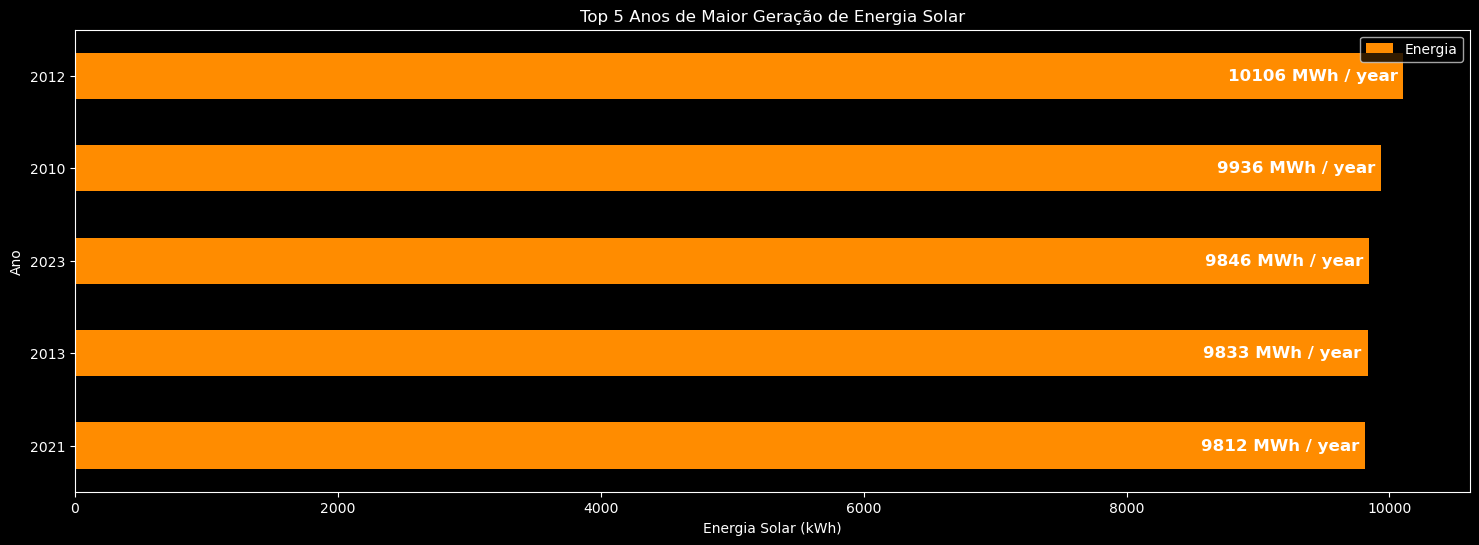

In [5]:
plotar_top_anos(data=dados_solcast, n=5, salvar_imagem=True, color="darkorange", figsize=(18, 6))

- *Cálculo da intervariabilidade anual*

In [6]:
dados_anuais = dados_solcast.resample("Y").sum()

intervariabilidade = (dados_anuais.std() / dados_anuais.mean())["Energia"]*100

print(f"A intervariabiliade anual da produção solar na região é de : {round(intervariabilidade, 1)}%")

A intervariabiliade anual da produção solar na região é de : 3.5%


- *Decomposição da série temporal*

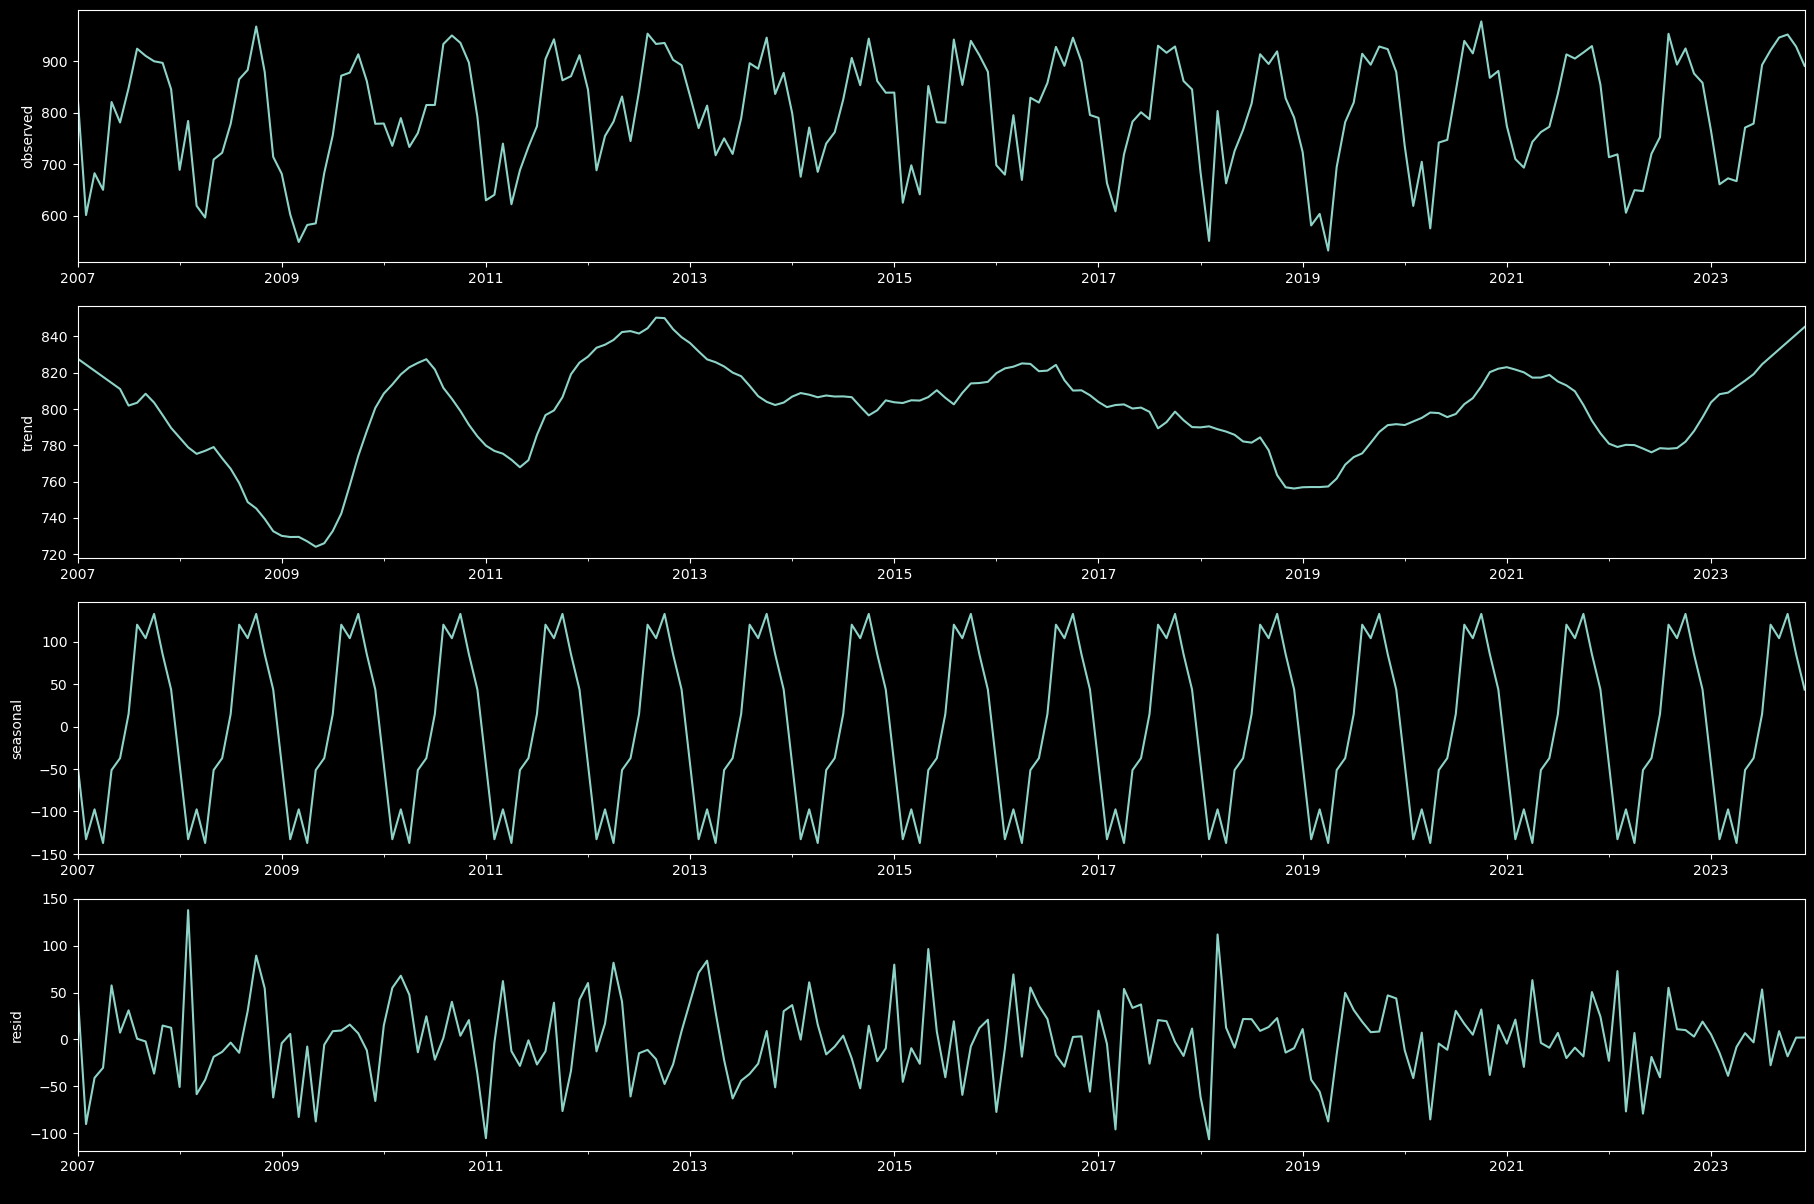

In [7]:
dados_mensais = dados_solcast.resample("MS").sum()

plotar_decomposicao(data=dados_mensais, salvar_imagem=True)

- *Próximos passos... previsão de geração para os próximos 5 anos usando **machine learning***